Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

Download and load the dataset

In [15]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [17]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


Visualizing the dataset

C:\Users\shehe\AppData\Local\Temp\ipykernel_16008\541114242.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title(labels[int(y_train[index])], fontsize=8)


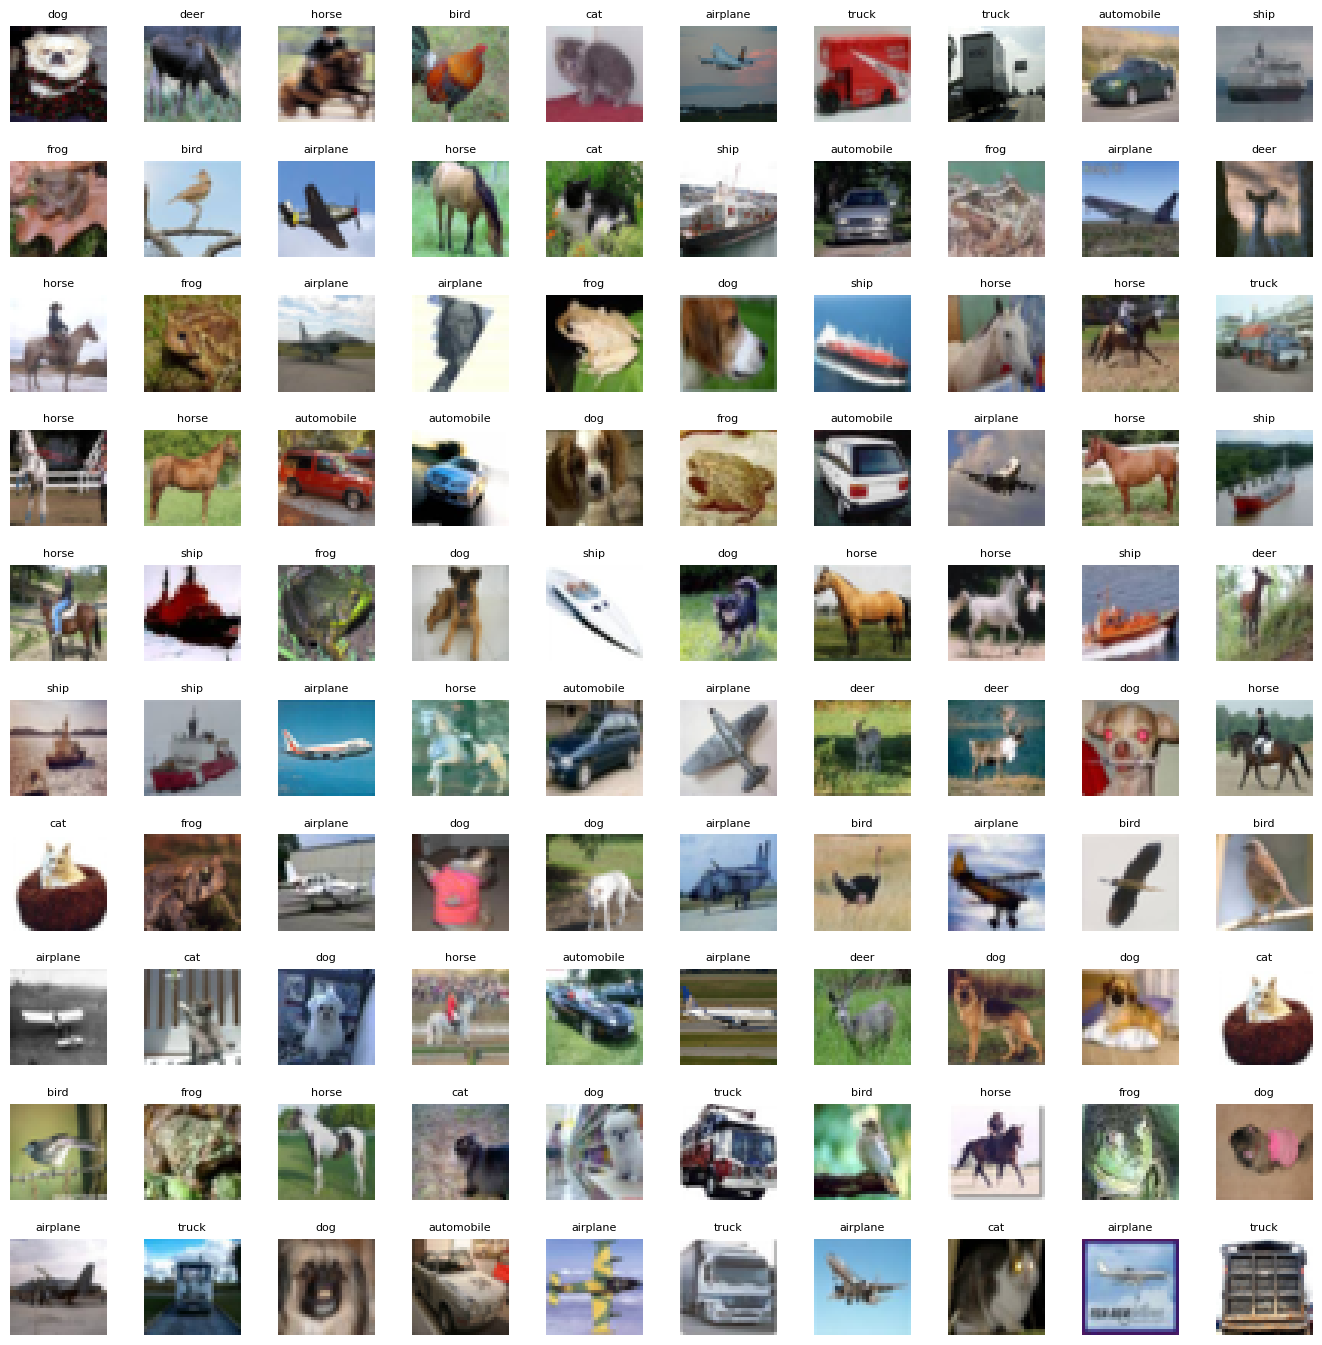

In [18]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

grid_width = 10
gird_length = 10

fig, axes = plt.subplots(gird_length, grid_width, figsize=(17, 17))

for ax in axes.ravel():
    index = np.random.randint(0, len(X_train))
    ax.imshow(X_train[index])
    ax.set_title(labels[int(y_train[index])], fontsize=8)
    ax.axis('off')

plt.subplots_adjust(hspace=0.4)
plt.show()

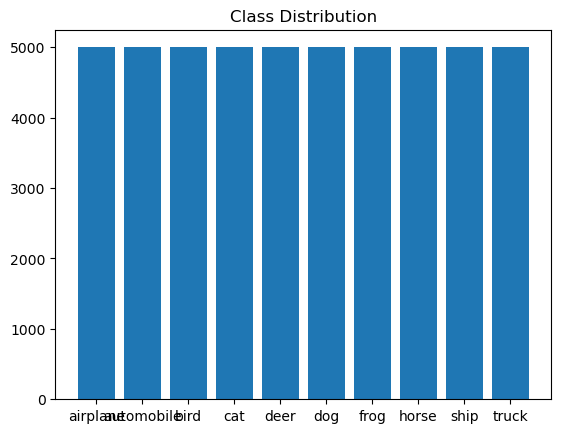

In [21]:
# graph for class distribution in dataset
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(labels, counts)
plt.title('Class Distribution')
plt.show()

Pre-processing dataset

In [19]:
# Design and implement a CNN model for the CIFAR-10 dataset
# Preprocess the data
# Train the model
# Evaluate the model

# Preprocess the data
# Normalize the data
# One-hot encode the labels
# Split the data into training and testing sets
# Train the model
# Evaluate the model

# Normalize the data
X_train = X_train / 255
X_test = X_test / 255

# One-hot encode the labels
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_cat_train, y_val = train_test_split(X_train, y_cat_train, test_size=0.2, random_state=42)

Model Training

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
import tensorflow as tf

INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
NUM_CLASSES = 10

model = Sequential([
    Conv2D(32, KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, KERNEL_SIZE, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, KERNEL_SIZE, activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, KERNEL_SIZE, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, KERNEL_SIZE, activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, KERNEL_SIZE, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(NUM_CLASSES, activation='softmax')
])

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [23]:
model.summary()

# Train the model
EPOCHS = 100
BATCH_SIZE = 32

early_stop = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_cat_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), callbacks=[early_stop])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

Model evaluation

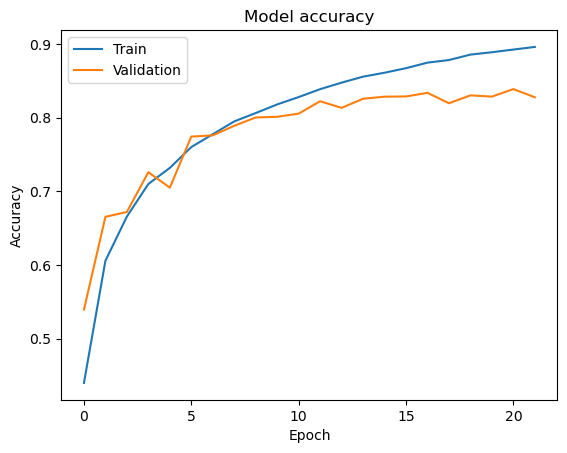

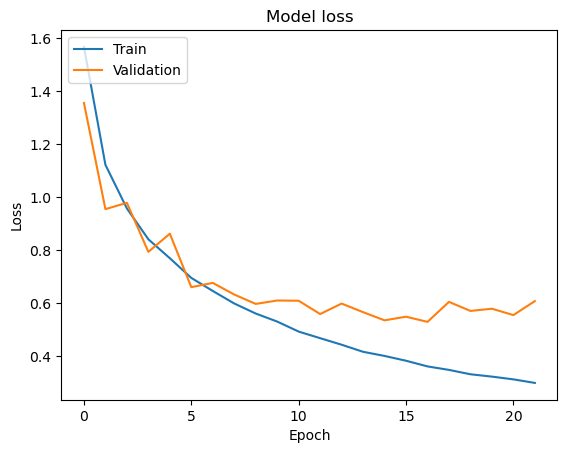

In [29]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Confusion matrix and classification report

313/313 [==============================] - 6s 18ms/step
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1000
           1       0.90      0.93      0.91      1000
           2       0.71      0.79      0.75      1000
           3       0.76      0.54      0.63      1000
           4       0.76      0.84      0.80      1000
           5       0.74      0.78      0.76      1000
           6       0.90      0.83      0.86      1000
           7       0.92      0.82      0.87      1000
           8       0.88      0.91      0.89      1000
           9       0.84      0.91      0.88      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



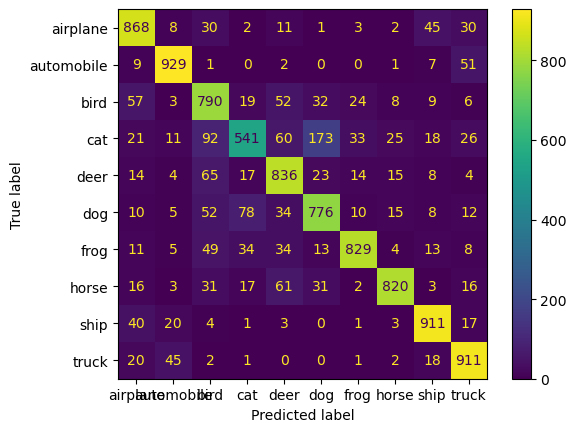

In [39]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

313/313 [==============================] - 6s 18ms/step


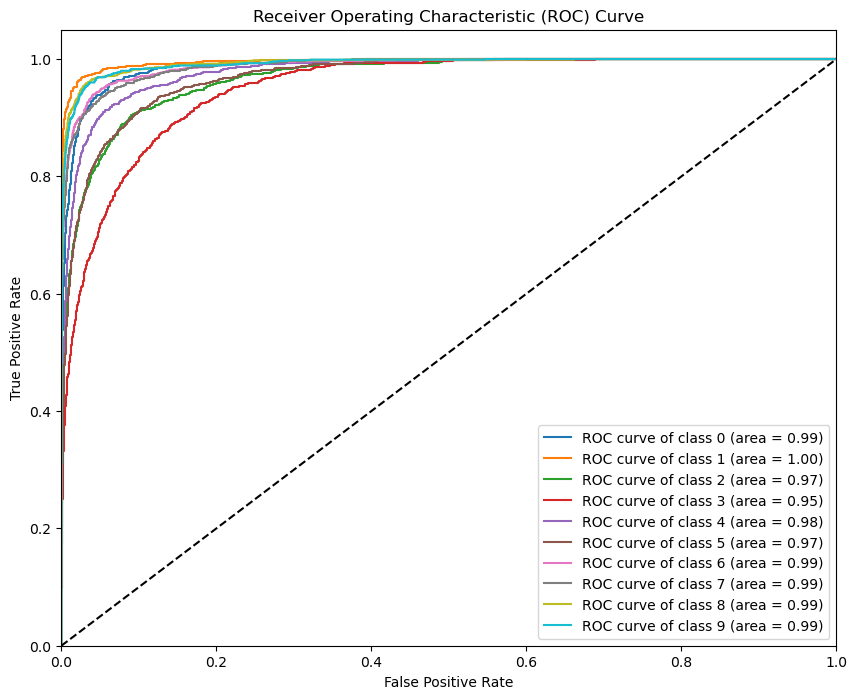

In [42]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Binarize the labels for multiclass ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Make predictions
y_pred_prob = model.predict(X_test)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):  # Assuming 10 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Saving the model

In [40]:
# save model
model.save('cifar10_model.h5')

c:\Users\shehe\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# hyperparameter tuning using loops

# Define the hyperparameters
KERNEL_SIZES = [(3, 3), (5, 5)]
FILTER_SIZES = [32, 64]
DROPOUT_RATES = [0.25, 0.5]

# Create a list to store the results
results = []

# Loop through the hyperparameters
for kernel_size in KERNEL_SIZES:
    for filter_size in FILTER_SIZES:
        for dropout_rate in DROPOUT_RATES:
            # Create the model
            model = Sequential([
                Conv2D(filter_size, kernel_size, input_shape=INPUT_SHAPE, activation='relu', padding='same'),
                BatchNormalization(),
                Conv2D(filter_size, kernel_size, activation='relu', padding='same'),
                BatchNormalization(),
                MaxPool2D(pool_size=(2, 2)),
                Dropout(dropout_rate),

                Conv2D(filter_size * 2, kernel_size, activation='relu', padding='same'),
                BatchNormalization(),
                Conv2D(filter_size * 2, kernel_size, activation='relu', padding='same'),
                BatchNormalization(),
                MaxPool2D(pool_size=(2, 2)),
                Dropout(dropout_rate),

                Conv2D(filter_size * 4, kernel_size, activation='relu', padding='same'),
                BatchNormalization(),
                Conv2D(filter_size * 4, kernel_size, activation='relu', padding='same'),
                BatchNormalization(),
                MaxPool2D(pool_size=(2, 2)),
                Dropout(dropout_rate),

                Flatten(),
                Dense(128, activation='relu'),
                Dropout(dropout_rate),
                Dense(NUM_CLASSES, activation='softmax')
            ])

            # Compile the model
            model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

            # Train the model
            history = model.fit(X_train, y_cat_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), callbacks=[early_stop])

            # Evaluate the model
            results.append({
                'kernel_size': kernel_size,
                'filter_size': filter_size,
                'dropout_rate': dropout_rate,
                'accuracy': history.history['accuracy'][-1],
                'val_accuracy': history.history['val_accuracy'][-1],
                'loss': history.history['loss'][-1],
                'val_loss': history.history['val_loss'][-1]
            })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)